Description:
- This notebook shows some exploratory data analysis about the datasets used for the rumex1 paper.
- Output:
    - CSV file: lightly_totalimages_selectedimages.csv: the first csv construction from the dataset
    - CSV file: lightly_totalimages_selectedimages_annotated.csv: adds the selected images for annotations
    - CSV file: lightly_totalimages_selectedimages_annotated_with_fields_label: Adds the field tag
    - figure: the distribution of the dataset for each field with original number, selected for annotations, annotated

Where to run:
- Runs only on the EO server or any machine connected to the O-Drive because it analyzes data about the images that are already stored on O-drive

In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

In [ ]:
# Load the Lightly selection in a list

In [ ]:
lightly_file_name = '../assets/filenames-rumex_4by_4_50k-coreset-samples_20000-1688802987585.txt'

with open(lightly_file_name, 'r') as file:
    lines = file.readlines()

# Remove newline characters
lines = [line.strip() for line in lines]
im_list_lightly = [line.split('/')[0] for line in lines]


In [ ]:
# Count the number of images in each dataset before and after lightly selection

In [ ]:
root = '/mnt/Foto-Work-RE/26_Agricultural_Engineering-RE/263_DP/Fenaco_Blackenprojekt_2021-2023/_CURATED_DATA_SETS/'
d_path_lightly_all = os.path.join(root, 'DataSelection/AllImages')
datasets = os.listdir(d_path_lightly_all)
datasets[0]

In [ ]:
# Counting the number of images of each fiel in the lightly dataset
df = pd.DataFrame(columns=['dataset', 'total_nb_images', 'total_selected_lightly', 'size_gb'])
index = 0
for d in tqdm(datasets):
    d_path_original = os.path.join(root, 'DataSelection/AllImages', d)
    # Total number of images  in the original dataset before lightly filtering
    total_nb_images = sum( 1 for filename in os.listdir(d_path_original) if filename.endswith('.png'))
    
    # Check total number of annotated images from the lightly dataset
    total_selected_lightly = im_list_lightly.count(d)
    total_size = 0
    for image in os.listdir(d_path_original):
        if image.lower().endswith(('.png', '.jpeg')):
            file_path = os.path.join(d_path_original, image)
            total_size += os.path.getsize(file_path)

    total_gb = total_size / (1024**3)


    row = [d, total_nb_images, total_selected_lightly, total_gb]  # You can customize these values
    df.loc[index] = row
    if (total_nb_images < total_selected_lightly):
        print(d)
    index = index + 1

In [ ]:
df

In [ ]:
df[df['total_nb_images'] < df['total_selected_lightly']]

In [ ]:
df.to_csv('../assets/lightly_totalimages_selectedimages.csv', index=False)

In [ ]:
# 20220823_HaldenSued_S_10_F_50_O_stra_ID1	haldensued08
# 20220901_HaldenNord_S_10_F_50_O_sama_ID1	haldennord09
# 20221010_HaldenNord_S_25_F_60_O_sama_ID1	haldennord10
# 20221010_HaldenSued_S_25_F_60_sama_ID1	haldensued10


In [ ]:
# Total size of GBs for all dataset in lightly

In [ ]:
np.sum(df['size_gb'])

In [ ]:
# Size of the dataset 20221010_HaldenSued_S_25_F_60_sama_ID1 ==> Total number of images

In [ ]:
np.sum(df['size_gb']) + 33.4 # 21 is the 68th Field

In [ ]:
3321.0813491325825 + 33.6

In [ ]:
df[df['dataset'] == '20220823_HaldenSued_S_10_F_50_O_stra_ID1']

In [ ]:
df[df['dataset'] == '20220901_HaldenNord_S_10_F_50_O_sama_ID1']

In [ ]:
df[df['dataset'] == '20221010_HaldenNord_S_25_F_60_O_sama_ID1']

In [ ]:
df[df['dataset'] == '20221010_HaldenSued_S_25_F_60_sama_ID1']

In [ ]:
# Total number of images treated

In [ ]:
nb_images_20221010_HaldenSued_S_25_F_60_sama_ID1 = 1599
nb_images_all_others = np.sum(df['total_nb_images'])
nb_all_images = nb_images_all_others + nb_images_20221010_HaldenSued_S_25_F_60_sama_ID1
nb_all_images

In [ ]:
508150 - 999 + 1599

In [ ]:
np.sum(df['total_selected_lightly'])

In [ ]:
# Populating the CSV file with the total number of images with annotations

In [ ]:
# Read the CSV file
df = pd.read_csv('../assets/lightly_totalimages_selectedimages.csv')

In [ ]:
fields = [d.split('_')[1].lower() for d in df['dataset']]
fields

In [ ]:
len(set(fields))

In [ ]:
set(fields)

In [ ]:
for dataset in ['haldennord09', 'haldensued08', 'haldensued10', 'haldennord10']:

   # Read the total number of annotated images
     #ann_path = f'/data/images/darwin/digital-production/{dataset}/releases/latest/annotations'
    ann_path = f'../assets/digital-production/{dataset}/releases/1/annotations'
    if os.path.exists(ann_path):
        ann_path = ann_path
    else:
        ann_path = f'../assets/digital-production/{dataset}/releases/2/annotations'


    total_annotated = len([name for name in os.listdir(ann_path) if name.endswith('.json')]) 
    # count the json files in the annotations directory
    
    # Update the DataFrame
    print(total_annotated)

In [ ]:
# Populating the dataframe with the number of annotated images from each dataset inside the lightly dataset
ann_path = f'/data/images/darwin/digital-production/lightly/releases/1/annotations'
ann_path = f'../assets/digital-production/lightly/releases/1/annotations'

annotations = [name for name in os.listdir(ann_path) if name.endswith('.json')]
annotations =[ '_'.join(i.split('.')[0].split ('_')[:-3] )  for i in annotations] 
# loop over the df rows 
for index, row in df.iterrows():
    dataset = row['dataset']
    # Count the number of annotations for the current dataset
    total_annotated = sum(1 for ann in annotations if dataset in ann)
    
    # Update the DataFrame
    df.at[index, 'total_annotated'] = total_annotated

In [ ]:
np.sum(df['total_annotated'])

In [ ]:
# put df in a news scv file
df.to_csv('../assets/lightly_totalimages_selectedimages_annotated.csv', index=False)

In [ ]:
df = pd.read_csv('../assets/lightly_totalimages_selectedimages_annotated.csv')

In [ ]:
df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame here
# Example:
# df = pd.read_csv('your_dataset.csv')

# For demonstration, this assumes `df` is already available
# Ensure all numeric columns are numeric
df['total_nb_images'] = pd.to_numeric(df['total_nb_images'], errors='coerce')
df['total_selected_lightly'] = pd.to_numeric(df['total_selected_lightly'], errors='coerce')
df['total_annotated'] = pd.to_numeric(df['total_annotated'], errors='coerce')

# Sort by total_nb_images descending
df_sorted = df.sort_values(by='total_nb_images', ascending=False)

# Compute the residual parts of the bars
df_sorted['selected_lightly_but_not_annotated'] = df_sorted['total_selected_lightly'] - df_sorted['total_annotated']
df_sorted['unselected_for_annotation'] = df_sorted['total_nb_images'] - df_sorted['total_selected_lightly']
df_sorted

In [ ]:
df_sorted = df_sorted[[col for col in df_sorted.columns if col != 'size_gb'] + ['size_gb']]
df_sorted

In [ ]:
# Remove datasets where images where not selected
df_sorted_no_ann_removed = df_sorted[df_sorted["total_annotated"] != 0]


In [ ]:
df_sorted_no_ann_removed

In [ ]:

# Add the new field_label column
df_sorted_no_ann_removed['field_label'] = [f'F {i+1}' for i in range(len(df_sorted_no_ann_removed))]

# Reorder columns to put 'field_label' as the second column
cols = df_sorted_no_ann_removed.columns.tolist()
# Move 'field_label' to index 1
cols.insert(1, cols.pop(cols.index('field_label')))
df_sorted_no_ann_removed = df_sorted_no_ann_removed[cols]


In [ ]:
df_sorted_no_ann_removed = df_sorted_no_ann_removed.reset_index(drop=True)
df_sorted_no_ann_removed

In [ ]:
df_sorted_no_ann_removed.to_csv('../assets/lightly_totalimages_selectedimages_annotated_with_fields_label.csv', index=False)

In [6]:
df_sorted_no_ann_removed = pd.read_csv('../assets/lightly_totalimages_selectedimages_annotated_with_fields_label.csv')

In [7]:
for d in ['20220823_HaldenSued_S_10_F_50_O_stra_ID1', '20220901_HaldenNord_S_10_F_50_O_sama_ID1', '20221010_HaldenNord_S_25_F_60_O_sama_ID1', '20221010_HaldenSued_S_25_F_60_sama_ID1']:
    print(d)
    print(df_sorted_no_ann_removed[df_sorted_no_ann_removed['dataset'] == d])

20220823_HaldenSued_S_10_F_50_O_stra_ID1
                                    dataset field_label  total_nb_images  \
9  20220823_HaldenSued_S_10_F_50_O_stra_ID1        F 10            13983   

   total_selected_lightly  total_annotated  \
9                     467              8.0   

   selected_lightly_but_not_annotated  unselected_for_annotation    size_gb  
9                               459.0                      13516  90.774811  
20220901_HaldenNord_S_10_F_50_O_sama_ID1
                                     dataset field_label  total_nb_images  \
16  20220901_HaldenNord_S_10_F_50_O_sama_ID1        F 17             9840   

    total_selected_lightly  total_annotated  \
16                      32             12.0   

    selected_lightly_but_not_annotated  unselected_for_annotation   size_gb  
16                                20.0                       9808  59.88314  
20221010_HaldenNord_S_25_F_60_O_sama_ID1
                                    dataset field_label  total_nb_ima

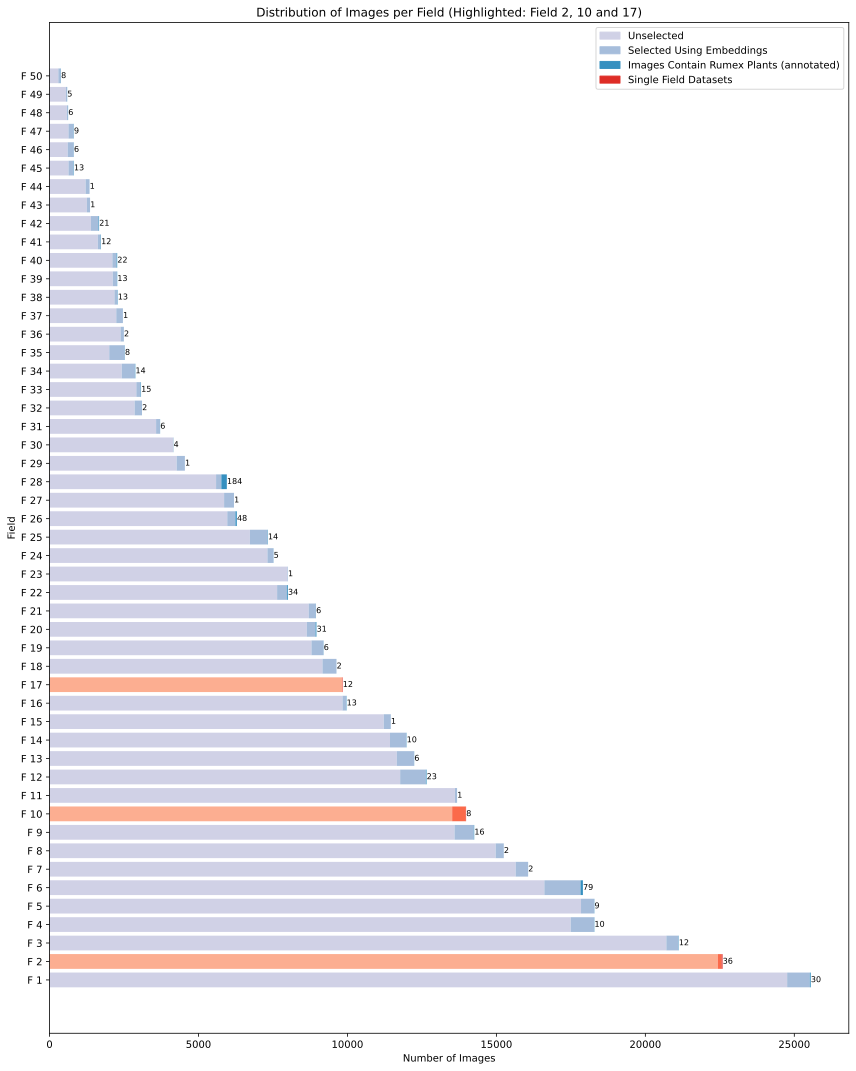

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Set figure size
num_fields = len(df_sorted_no_ann_removed)
fig, ax = plt.subplots(figsize=(12, num_fields * 0.3))

# Define fields to highlight
highlight_fields = ['F 2', 'F 10', 'F 17']

# Colors
colors_normal = {
    'unselected': '#d0d1e6',
    'selected': '#a6bddb',
    'annotated': '#3690c0'
}
colors_highlight = {
    'unselected': '#fcae91',   # salmon
    'selected': '#fb6a4a',     # red-orange
    'annotated': '#de2d26'     # bold red
}

# Determine bar colors per row
bar_colors_unselected = []
bar_colors_selected = []
bar_colors_annotated = []

for label in df_sorted_no_ann_removed['field_label']:
    if label in highlight_fields:
        bar_colors_unselected.append(colors_highlight['unselected'])
        bar_colors_selected.append(colors_highlight['selected'])
        bar_colors_annotated.append(colors_highlight['annotated'])
    else:
        bar_colors_unselected.append(colors_normal['unselected'])
        bar_colors_selected.append(colors_normal['selected'])
        bar_colors_annotated.append(colors_normal['annotated'])

# Plot bars
bar1 = ax.barh(df_sorted_no_ann_removed['field_label'], df_sorted_no_ann_removed['unselected_for_annotation'],
               color=bar_colors_unselected, label='Unselected for Annotation')

bar2 = ax.barh(df_sorted_no_ann_removed['field_label'], df_sorted_no_ann_removed['selected_lightly_but_not_annotated'],
               left=df_sorted_no_ann_removed['unselected_for_annotation'], color=bar_colors_selected,
               label='Selected but Not Annotated')

bar3 = ax.barh(df_sorted_no_ann_removed['field_label'], df_sorted_no_ann_removed['total_annotated'],
               left=df_sorted_no_ann_removed['unselected_for_annotation'] + df_sorted_no_ann_removed['selected_lightly_but_not_annotated'],
               color=bar_colors_annotated, label='Annotated Images')

# Annotate bar3 (annotated images)
for i, (bar, value) in enumerate(zip(bar3, df_sorted_no_ann_removed['total_annotated'])):
    if value > 0:
        ax.text(bar.get_x() + bar.get_width() + 5,
                bar.get_y() + bar.get_height() / 2,
                f'{int(value)}', va='center', ha='left', fontsize=8)

# Labels and title
ax.set_xlabel('Number of Images')
ax.set_ylabel('Field')
ax.set_title('Distribution of Images per Field (Highlighted: Field 2, 10 and 17)')

# Set Y-ticks directly from field_label
ax.set_yticks(range(num_fields))
ax.set_yticklabels(df_sorted_no_ann_removed['field_label'])

# Custom legend to match the main categories (not individual highlights)
from matplotlib.patches import Patch
custom_legend = [
    Patch(color=colors_normal['unselected'], label='Unselected'),
    Patch(color=colors_normal['selected'], label='Selected Using Embeddings'),
    Patch(color=colors_normal['annotated'], label='Images Contain Rumex Plants (annotated)'),
    Patch(color=colors_highlight['annotated'], label='Single Field Datasets')
]
ax.legend(handles=custom_legend, loc='upper right')

# Final layout + save
plt.tight_layout()
fig.savefig('./figures/dataset_distribution_highlighted.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Set figure size (taller and narrower)
num_fields = len(df_sorted_no_ann_removed)
fig, ax = plt.subplots(figsize=(num_fields * 0.3, 8))  # Adjust width and height

# Define fields to highlight
highlight_fields = ['F 2', 'F 10', 'F 17']

# Colors
colors_normal = {
    'unselected': '#d0d1e6',
    'selected': '#a6bddb',
    'annotated': '#3690c0'
}
colors_highlight = {
    'unselected': '#fcae91',
    'selected': '#fb6a4a',
    'annotated': '#de2d26'
}

# Determine bar colors per field
bar_colors_unselected = []
bar_colors_selected = []
bar_colors_annotated = []

for label in df_sorted_no_ann_removed['field_label']:
    if label in highlight_fields:
        bar_colors_unselected.append(colors_highlight['unselected'])
        bar_colors_selected.append(colors_highlight['selected'])
        bar_colors_annotated.append(colors_highlight['annotated'])
    else:
        bar_colors_unselected.append(colors_normal['unselected'])
        bar_colors_selected.append(colors_normal['selected'])
        bar_colors_annotated.append(colors_normal['annotated'])

# Define tight x positions with minimal spacing
x = np.arange(num_fields)
bar_width = 0.6  # thinner bars

# Plot bars
bar1 = ax.bar(x, df_sorted_no_ann_removed['unselected_for_annotation'],
              width=bar_width, color=bar_colors_unselected, label='Unselected for Annotation')

bar2 = ax.bar(x, df_sorted_no_ann_removed['selected_lightly_but_not_annotated'],
              width=bar_width, bottom=df_sorted_no_ann_removed['unselected_for_annotation'], color=bar_colors_selected,
              label='Selected but Not Annotated')

bottom_total = df_sorted_no_ann_removed['unselected_for_annotation'] + df_sorted_no_ann_removed['selected_lightly_but_not_annotated']
bar3 = ax.bar(x, df_sorted_no_ann_removed['total_annotated'], width=bar_width,
              bottom=bottom_total, color=bar_colors_annotated, label='Annotated Images')

# Annotate bar3
for i, (bar, value) in enumerate(zip(bar3, df_sorted_no_ann_removed['total_annotated'])):
    if value > 0:
        ax.text(bar.get_x() + bar.get_width() / 2,
                bar.get_height() + bar.get_y() + 5,
                f'{int(value)}', ha='center', va='bottom', fontsize=8)

# Labels and title
ax.set_ylabel('Number of Images')
ax.set_xlabel('Field')
ax.set_title('Distribution of Images per Field (Highlighted: Field 2, 10 and 17)')

# Set X-ticks
ax.set_xticks(x)
ax.set_xticklabels(df_sorted_no_ann_removed['field_label'], rotation=90)

# Remove excess space before first and after last bar
ax.set_xlim(-0.5, num_fields - 0.5)

# Legend
custom_legend = [
    Patch(color=colors_normal['unselected'], label='Unselected'),
    Patch(color=colors_normal['selected'], label='Selected Using Embeddings'),
    Patch(color=colors_normal['annotated'], label='Images Contain Rumex Plants (annotated)'),
    Patch(color=colors_highlight['annotated'], label='Single Field Datasets')
]
ax.legend(handles=custom_legend, loc='upper right')

# Final layout + save
plt.tight_layout()
fig.savefig('./figures/dataset_distribution_vertical_compact.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
df_sorted_no_ann_removed[df_sorted_no_ann_removed['dataset'] == '20220823_HaldenSued_S_10_F_50_O_stra_ID1']

In [ ]:
df_sorted_no_ann_removed[df_sorted_no_ann_removed['dataset'] == '20220901_HaldenNord_S_10_F_50_O_sama_ID1']

In [ ]:
df_sorted_no_ann_removed[df_sorted_no_ann_removed['dataset'] == '20221010_HaldenNord_S_25_F_60_O_sama_ID1']

In [ ]:
df_sorted_no_ann_removed[df_sorted_no_ann_removed['dataset'] == '20221010_HaldenSued_S_25_F_60_sama_ID1']